<a href="https://colab.research.google.com/github/kazim-glitch/Deep-learning/blob/main/Multilayer_perceptron_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import  numpy as np
import matplotlib.pyplot as plt

In [2]:
from torchvision import  datasets
import torchvision.transforms as transforms

batch_size=20

transform = transforms.ToTensor()



In [3]:
train_data = datasets.MNIST(root='data',train=True,download=True,transform=transform)

test_data = datasets.MNIST(root='data',train=False,download=True,transform=transform)

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw




Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [4]:
train_loader = torch.utils.data.DataLoader(train_data,batch_size=batch_size,num_workers=0)

test_loader = torch.utils.data.DataLoader(test_data,batch_size=batch_size,num_workers=0)

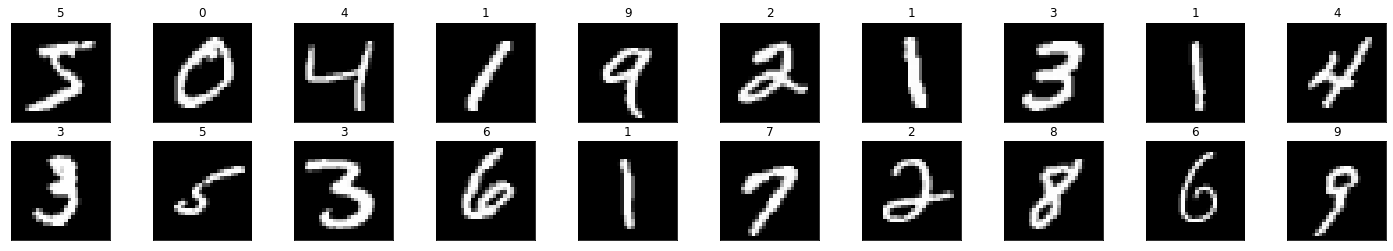

In [5]:


dataiter = iter(train_loader)

images,labels = dataiter.next()

images = images.numpy()

fig = plt.figure(figsize=(25,4))

for i in np.arange(20):
  ax=fig.add_subplot(2,20/2,i+1,xticks=[],yticks=[])
  ax.imshow(np.squeeze(images[i]),cmap='gray')
  # plt.show()
  ax.set_title(str(labels[i].item()))

In [6]:
#defining the mlp model architecture

import torch.nn as nn 
import torch.nn.functional as F

class Network(nn.Module):
  def __init__(self):

    super(Network,self).__init__()


    self.f1 = nn.Linear(784,1)

    self.f2= nn.Linear(784,256)

    self.f3 = nn.Linear(256,64)

    self.f4 = nn.Linear(64,10)

    self.dropout = nn.Dropout(0.2)

  def forward(self,x):
    x.view(-1,784)

    x=F.Relu(self.f1(x))
    self.dropout(x)
    x=F.Relu(self.f2(x))
    self.dropout(x)
    x =F.leaky_relu(self.f3(x))
    self.dropout(x)
    x=nn.LogSoftmax(self.f4)

    return x


model = Network()
print(model)

Network(
  (f1): Linear(in_features=784, out_features=1, bias=True)
  (f2): Linear(in_features=784, out_features=256, bias=True)
  (f3): Linear(in_features=256, out_features=64, bias=True)
  (f4): Linear(in_features=64, out_features=10, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)


In [7]:
criterion = nn.CrossEntropyLoss()

optimiser = torch.optim.SGD(model.parameters(),lr=0.03)
